In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Some utility Methods

In [2]:
def Get_MissingFeatures_MoreThan_N_Percent(data: pd.DataFrame, N:float):
    missingFeatures = data.columns[data.isnull().mean() > N]
    return missingFeatures

In [182]:
#del main_df
#del main_Test_df
#del main_Train_df
#del main_scalled_df
#del main_Train_scalled_df
#del main_Test
#del X_Scalled_Test
#del X_Scalled_Train
#del X_Test
#del X_Train
# import gc
# gc.collect()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Leads.csv')

In [5]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Total 9240 samples available having 37 columns

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


No Use of Id or index columns lets drop them

In [8]:
main_df = df.drop(['Prospect ID', 'Lead Number'], axis=1)

We see many columns have null values. Lets fix those missing values first

In [13]:
mssing_morethan_40 = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0.4)

In [14]:
mssing_morethan_40

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

The above columns having more than 40% data missing so it would be better to drop the columns

In [15]:
main_df.drop(mssing_morethan_40, axis=1, inplace=True)

In [17]:
missing_morethan_30 = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0.3)

In [18]:
missing_morethan_30

Index(['Tags'], dtype='object')

In [19]:
main_df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

Lets not frop this tag column and create a Other category for the missing values

In [20]:
main_df['Tags'].replace(np.nan, 'Not Specified', inplace=True)

Lets convert the SELECT category to NaN to find more features with missing values

In [21]:
# lets find all categorical columns
cat_cols = main_df.select_dtypes(include='object').columns
len(cat_cols)

26

In [22]:
{column: main_df[column].nunique() for column in cat_cols}

{'Lead Origin': 5,
 'Lead Source': 21,
 'Do Not Email': 2,
 'Do Not Call': 2,
 'Last Activity': 17,
 'Country': 38,
 'Specialization': 19,
 'How did you hear about X Education': 10,
 'What is your current occupation': 6,
 'What matters most to you in choosing a course': 3,
 'Search': 2,
 'Magazine': 1,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'Receive More Updates About Our Courses': 1,
 'Tags': 27,
 'Update me on Supply Chain Content': 1,
 'Get updates on DM Content': 1,
 'Lead Profile': 6,
 'City': 7,
 'I agree to pay the amount through cheque': 1,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16}

Finding the features having SELECT as category

In [23]:
columns_having_select = [col for col in cat_cols if 'Select' in main_df[col].unique()]

Replacing the Select with NaN

In [24]:
for col in columns_having_select:
    main_df[col] = main_df[col].replace('Select', np.nan)

In [30]:
missing_morethan_40 = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0.4)

In [31]:
missing_morethan_40

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [35]:
main_df['Lead Profile'].unique()

array([nan, 'Potential Lead', 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [36]:
main_df.drop(missing_morethan_40, axis=1, inplace=True)

In [50]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

In [49]:
main_df['Lead Source'].unique()

array(['Social Media', 'Search Engines', 'Direct Traffic', 'Referral',
       'Other'], dtype=object)

Here for Lead Source I can see some common categories so we can reduce the category here 

In [47]:
def MaptheSource(x):
    if x in ['Google','google', 'Organic Search',   'bing']:
        return 'Search Engines'
    elif x in ['Olark Chat', 'Facebook', 'blog', 'Social Media', 'Live Chat', 'youtubechannel', 'Press_Release' ]:
        return 'Social Media'
    elif x in ['Referral Sites', 'Reference']:
        return 'Referral'
    elif x in ['Direct Traffic']:
        return 'Direct Traffic'
    else:
        return 'Other'
main_df['Lead Source'].map(MaptheSource).unique()

array(['Social Media', 'Search Engines', 'Direct Traffic', 'Referral',
       'Other'], dtype=object)

In [48]:
main_df['Lead Source'] = main_df['Lead Source'].map(MaptheSource)

In [51]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

In [54]:
main_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [55]:
main_df['TotalVisits'].fillna(main_df['TotalVisits'].median(), inplace=True)

In [56]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

In [57]:
main_df['Page Views Per Visit'].isna().sum()

137

In [58]:
main_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [59]:
main_df['Page Views Per Visit'].fillna(main_df['Page Views Per Visit'].median(), inplace=True)

In [60]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

In [64]:
main_df['Last Activity'].fillna(main_df['Last Activity'].mode()[0], inplace=True)

In [65]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

In [68]:
main_df['Country'].value_counts(normalize=True) *100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

Here single value takes 95% of data so there is no such variation so we can drop this column

In [69]:
main_df.drop('Country', axis=1, inplace=True)

In [72]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['Specialization', 'Occupation',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

Renaming the occupation columns with simple name

In [71]:
main_df.rename({'What is your current occupation': 'Occupation'}, axis=1, inplace=True)

In [73]:
main_df['Specialization'].value_counts(normalize=True) *100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [76]:
main_df['Specialization'].fillna('Not Specified', inplace=True)

In Specialization we had more that 35% values missing so created a another category Not Specified

In [77]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['Occupation', 'What matters most to you in choosing a course', 'City'], dtype='object')

In [78]:
main_df['Occupation'].value_counts(normalize=True) *100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: Occupation, dtype: float64

In [84]:
main_df['Occupation'].unique()

array(['NonWorking', 'Student', 'Working'], dtype=object)

Here also we can corect the category lets remap

In [81]:
def MapOccupation(x):
    if x in ['Unemployed', 'Other', 'Housewife' ]:
        return 'NonWorking'
    elif x in ['Working Professional', 'Businessman']:
        return 'Working'
    elif x in ['Student']:
        return 'Student'
main_df['Occupation'].map(MapOccupation).value_counts(normalize=True) *100

NonWorking    85.893130
Working       10.900763
Student        3.206107
Name: Occupation, dtype: float64

In [82]:
main_df['Occupation'].fillna('Other', inplace=True)

In [83]:
main_df['Occupation'] = main_df['Occupation'].map(MapOccupation)

In [85]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['What matters most to you in choosing a course', 'City'], dtype='object')

In [86]:
main_df['What matters most to you in choosing a course'].value_counts(normalize=True) *100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

Here also the value is 100% same so let drop the feature

In [87]:
main_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [88]:
remaining_missing_value_features = Get_MissingFeatures_MoreThan_N_Percent(main_df, 0)
remaining_missing_value_features

Index(['City'], dtype='object')

In [89]:
main_df['City'].value_counts(normalize=True) *100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [90]:
main_df['City'].isna().sum()

3669

Lets re map this feature as well

In [93]:
main_df['City'].unique()

array(['Other Cities', 'Mumbai', 'Metro Cities'], dtype=object)

In [92]:
main_df['City'].fillna('Other Cities', inplace=True)
def MapCity(x):
    if x in ['Mumbai', 'Thane & Outskirts']:
        return 'Mumbai'
    elif x in ['Other Cities of Maharashtra', 'Other Cities', 'Tier II Cities']:
        return 'Other Cities'
    elif x in ['Other Metro Cities']:
        return 'Metro Cities'
main_df['City'] = main_df['City'].map(MapCity)

Now Lets check again if any columns having large number of missing values

In [95]:
main_df.isna().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
Occupation                                  0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content         

We are good with Missing values--------------------------------------

In [96]:
cat_cols = main_df.select_dtypes(include='object').columns

In [97]:
num_cols = main_df.select_dtypes(exclude='object').columns

All missing Values are taken care of here-----------------------------

## converting binary columns to 0 and 1 and other categorical columns to dummies

In [98]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  Occupation                          

In [99]:
main_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [100]:
{column: main_df[column].nunique() for column in cat_cols}

{'Lead Origin': 5,
 'Lead Source': 5,
 'Do Not Email': 2,
 'Do Not Call': 2,
 'Last Activity': 17,
 'Specialization': 19,
 'Occupation': 3,
 'Search': 2,
 'Magazine': 1,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'Receive More Updates About Our Courses': 1,
 'Tags': 27,
 'Update me on Supply Chain Content': 1,
 'Get updates on DM Content': 1,
 'City': 3,
 'I agree to pay the amount through cheque': 1,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16}

Lets check Binary categorical columns

In [102]:
features_with_YesNo = {column: main_df[column].nunique() for column in cat_cols if main_df[column].nunique() <= 2}

In [103]:
features_with_YesNo

{'Do Not Email': 2,
 'Do Not Call': 2,
 'Search': 2,
 'Magazine': 1,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'Receive More Updates About Our Courses': 1,
 'Update me on Supply Chain Content': 1,
 'Get updates on DM Content': 1,
 'I agree to pay the amount through cheque': 1,
 'A free copy of Mastering The Interview': 2}

In [105]:
for col in features_with_YesNo:
    #print(col)
    main_df[col] = main_df[col].map({'Yes': 1, 'No': 0})

In [115]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'Lead Origin': 5,
 'Lead Source': 5,
 'Last Activity': 17,
 'Specialization': 19,
 'Occupation': 3,
 'Tags': 27,
 'City': 3,
 'Last Notable Activity': 16}

In [113]:
main_df['Lead Origin'].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [114]:
LO = pd.get_dummies(main_df['Lead Origin'])
LO.drop('Quick Add Form', axis=1, inplace=True)

main_df = pd.concat([main_df, LO], axis=1)
main_df.drop('Lead Origin', axis=1, inplace=True)

In [117]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'Lead Source': 5,
 'Last Activity': 17,
 'Specialization': 19,
 'Occupation': 3,
 'Tags': 27,
 'City': 3,
 'Last Notable Activity': 16}

In [118]:
main_df['Lead Source'].value_counts(normalize=True) * 100

Search Engines    43.647186
Direct Traffic    27.521645
Social Media      19.675325
Referral           7.132035
Other              2.023810
Name: Lead Source, dtype: float64

In [119]:
LS = pd.get_dummies(main_df['Lead Source'])
LS.drop('Other', axis=1, inplace=True)
main_df = pd.concat([main_df, LS], axis=1)
main_df.drop('Lead Source', axis=1, inplace=True)

In [120]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'Last Activity': 17,
 'Specialization': 19,
 'Occupation': 3,
 'Tags': 27,
 'City': 3,
 'Last Notable Activity': 16}

In [124]:
main_df[['Last Activity', 'Last Notable Activity']].value_counts(normalize=True) * 100

Last Activity                 Last Notable Activity       
Email Opened                  Email Opened                    30.595238
SMS Sent                      SMS Sent                        23.506494
Olark Chat Conversation       Modified                         8.549784
Email Opened                  Modified                         7.716450
SMS Sent                      Modified                         6.201299
Converted to Lead             Modified                         4.632035
Page Visited on Website       Modified                         3.484848
                              Page Visited on Website          3.441558
Email Bounced                 Modified                         2.878788
Olark Chat Conversation       Olark Chat Conversation          1.980519
Email Link Clicked            Email Link Clicked               1.872294
Form Submitted on Website     Modified                         1.244589
Email Link Clicked            Modified                         1.017316
Unrea

Lets create a single column with mapping modified to reduce categories to more informative columns

In [128]:
def MapLastActivity(x):
    if x in ['Email Opened']:
        return 'Email Opened'
    elif x in ['SMS Sent']:
        return 'SMS Sent'
    elif x in ['Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received']:
        return 'Attempted to Contact'
    elif x in ['Modified']:
        return 'Modified'
    elif x in ['Email Bounced', 'Unsubscribed', 'Unreachable', 'Email Marked Spam']:
        return 'Unerachable'
    
main_df['Last Activity'].map(MapLastActivity).value_counts(normalize=True) * 100

    

Email Opened            51.296913
SMS Sent                39.776844
Unerachable              6.984495
Attempted to Contact     1.941748
Name: Last Activity, dtype: float64

In [129]:
main_df['Last Notable Activity'].map(MapLastActivity).value_counts(normalize=True) * 100


Modified                39.838634
Email Opened            33.056595
SMS Sent                25.397568
Unerachable              1.648737
Attempted to Contact     0.058466
Name: Last Notable Activity, dtype: float64

In [130]:
main_df['Lead Activity'] = main_df['Last Activity'].map(MapLastActivity)

In [131]:
main_df.drop(['Last Activity', 'Last Notable Activity'], axis=1, inplace=True)

In [132]:
LNA = pd.get_dummies(main_df['Lead Activity'])
LNA.drop('Attempted to Contact', axis=1, inplace=True)
main_df = pd.concat([main_df, LNA], axis=1)
main_df.drop('Lead Activity', axis=1, inplace=True)

In [133]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'Specialization': 19, 'Occupation': 3, 'Tags': 27, 'City': 3}

In [134]:
main_df['Specialization'].value_counts(normalize=True) * 100

Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [135]:
specialization = pd.get_dummies(main_df['Specialization'])
specialization.drop('Services Excellence', axis=1, inplace=True)
main_df = pd.concat([main_df, specialization], axis=1)
main_df.drop('Specialization', axis=1, inplace=True)

In [136]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'Occupation': 3, 'Tags': 27, 'City': 3}

In [137]:
main_df['Occupation'].value_counts(normalize=True) * 100

NonWorking    90.000000
Working        7.727273
Student        2.272727
Name: Occupation, dtype: float64

In [139]:
occupation = pd.get_dummies(main_df['Occupation'])
occupation.drop('Student', axis=1, inplace=True)
main_df = pd.concat([main_df, occupation], axis=1)
main_df.drop('Occupation', axis=1, inplace=True)

In [155]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'City': 3}

In [141]:
main_df['Tags'].value_counts(normalize=True) * 100

Not Specified                                        36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [142]:
tags = pd.get_dummies(main_df['Tags'])
tags.drop('Recognition issue (DEC approval)', axis=1, inplace=True)
main_df = pd.concat([main_df, tags], axis=1)
main_df.drop('Tags', axis=1, inplace=True)

In [159]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{}

In [157]:
main_df['City'].value_counts(normalize=True) * 100

Other Cities    52.878788
Mumbai          43.008658
Metro Cities     4.112554
Name: City, dtype: float64

In [158]:
city = pd.get_dummies(main_df['City'])
city.drop('Metro Cities', axis=1, inplace=True)
main_df = pd.concat([main_df, city], axis=1)
main_df.drop('City', axis=1, inplace=True)

Now we have converted all Categorical variables into numerical variables

## univariate analysis

In [66]:
num_cols = main_df.select_dtypes(exclude='object').columns

In [68]:
main_df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.000216,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,0.014711,0.014711,0.486714,4.818723,548.021466,2.145333,0.038898,0.0,0.014711,0.010403,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train Test Split

In [143]:
# include sklearn train test split
from sklearn.model_selection import train_test_split

In [221]:
main_Train_df, main_Test_df = train_test_split(main_df, test_size=0.3, random_state=100)

In [222]:
y_Train = main_Train_df.pop('Converted')
X_Train = main_Train_df

## Feature scalling

In [162]:
from sklearn.preprocessing import StandardScaler

In [147]:
X_Train.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
6487,1,0,2.0,239,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4759,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
scaller = StandardScaler()
X_Train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaller.fit_transform(X_Train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

Lets check for Data imbalance 

In [149]:
sum(main_df['Converted']) / len(main_df['Converted']) * 100

38.53896103896104

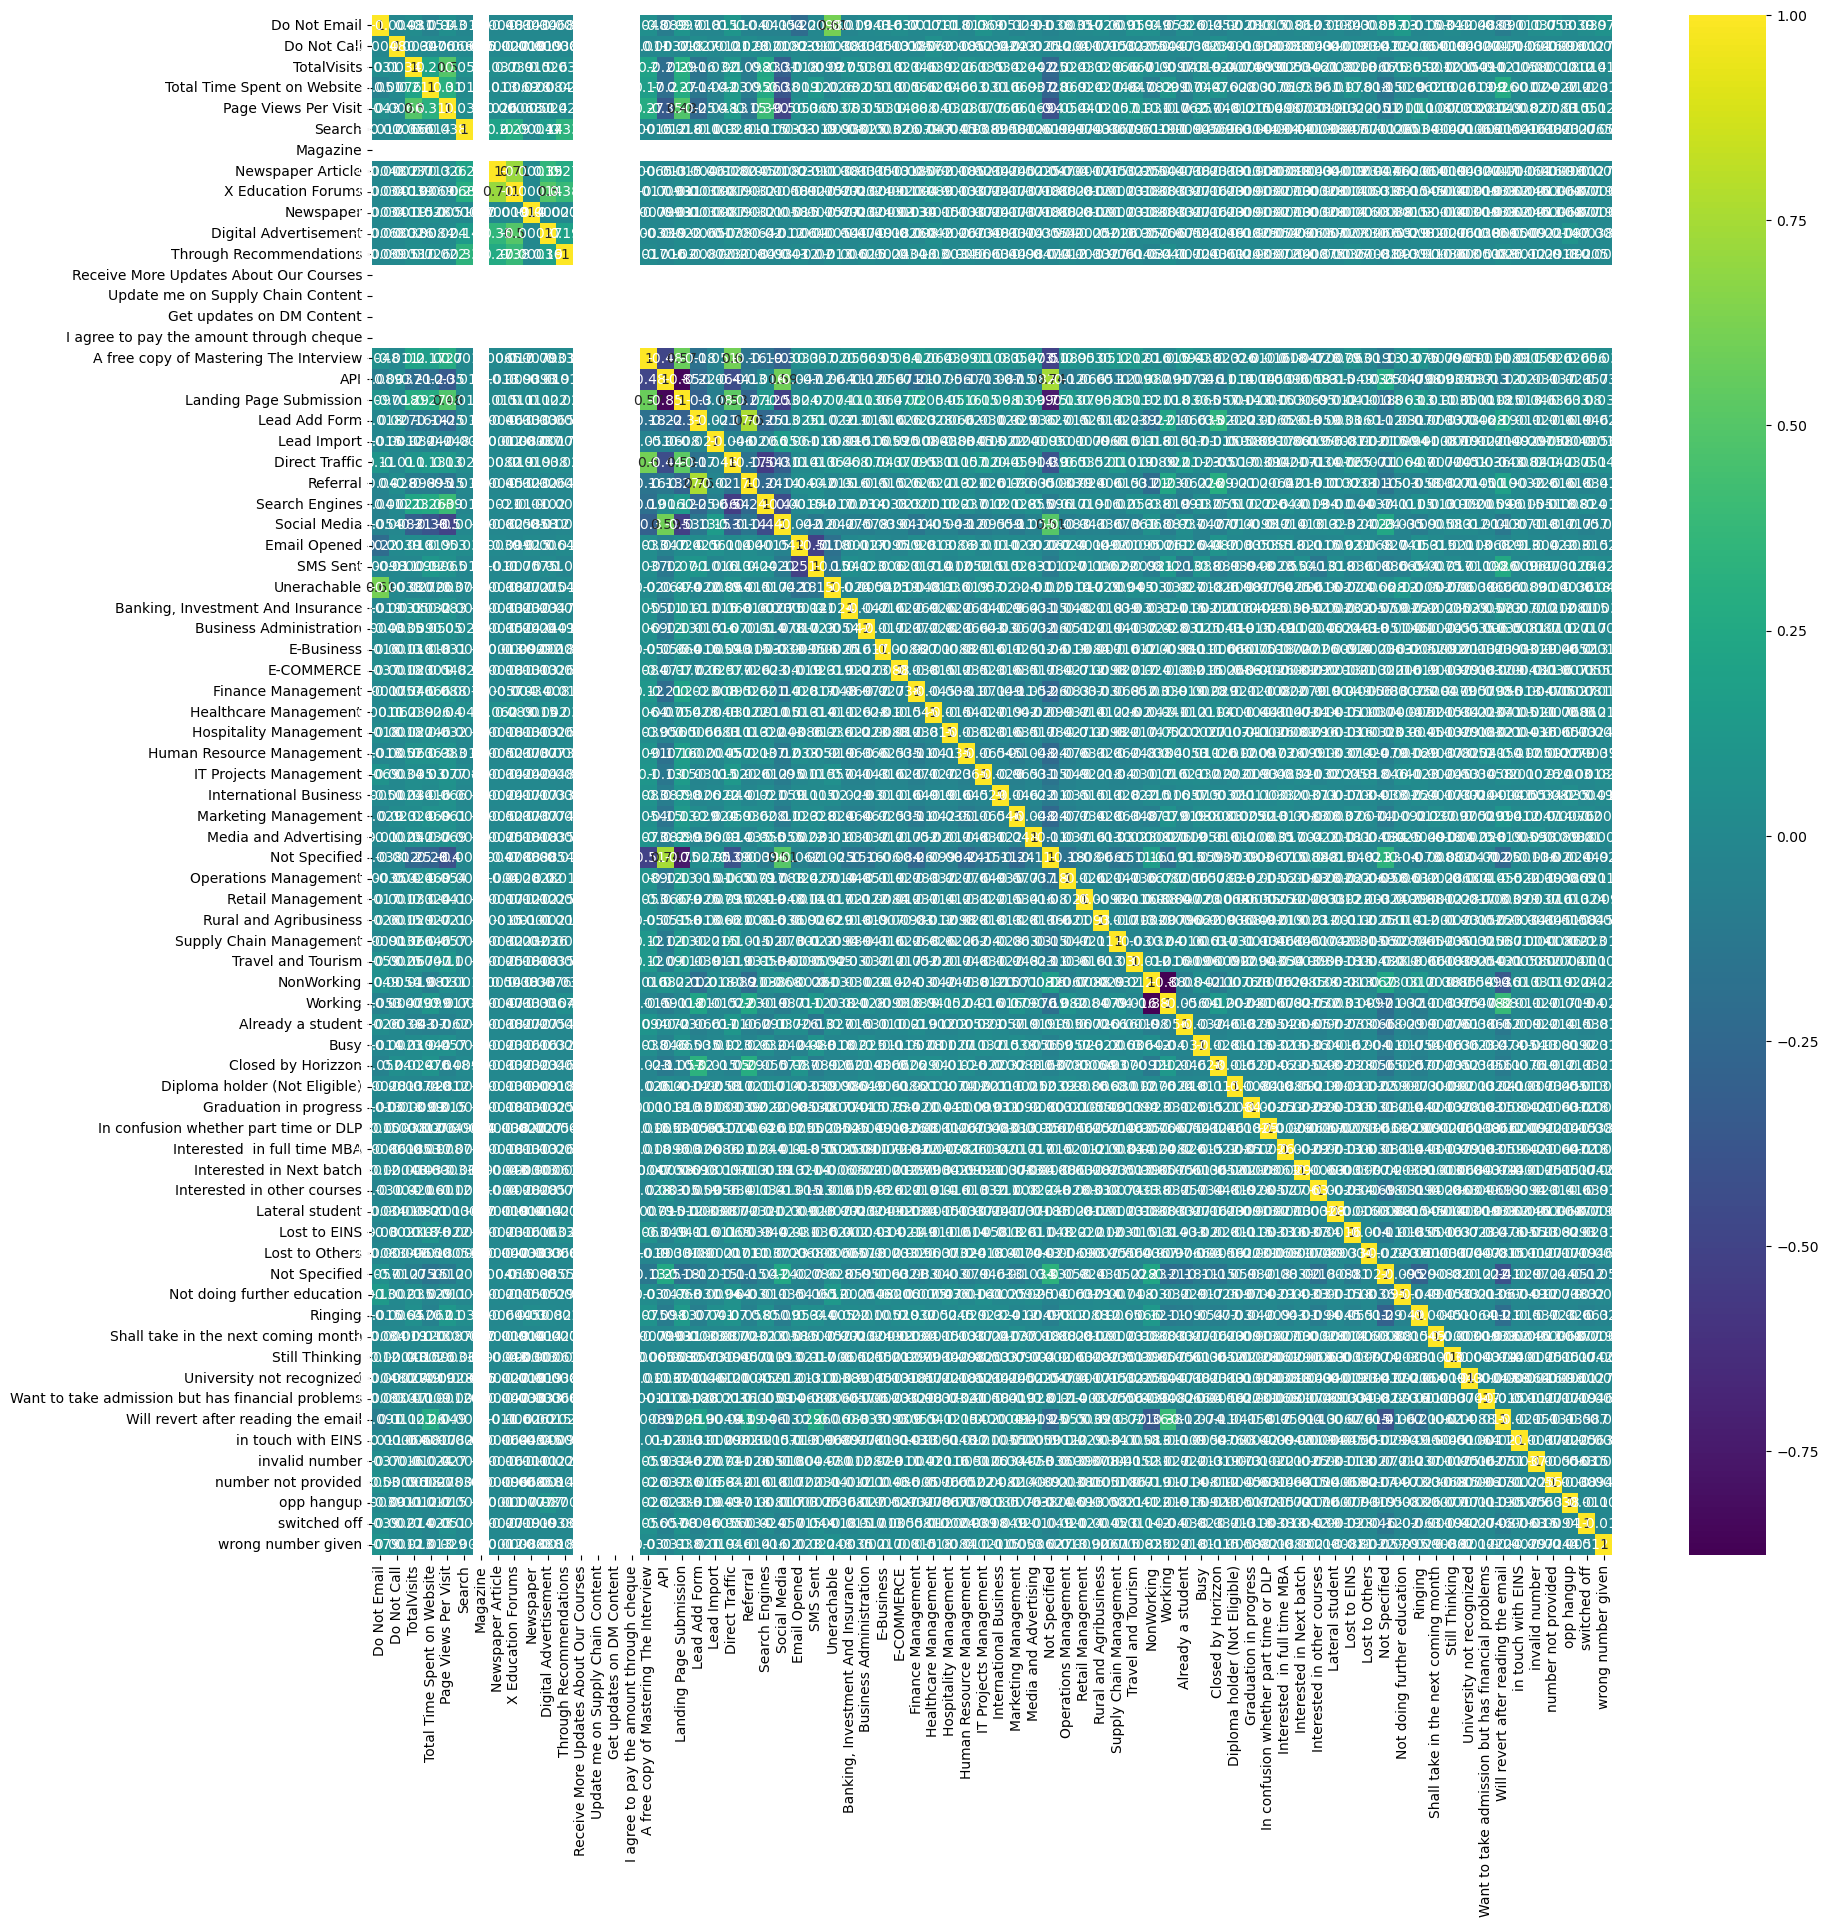

In [150]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_Train.corr(), annot=True, cmap='viridis')
plt.show()

In [224]:
X_Train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'API',
       'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Direct Traffic', 'Referral', 'Search Engines', 'Social Media',
       'Email Opened', 'SMS Sent', 'Unerachable',
       'Banking, Investment And Insurance', 'Business Administration',
       'E-Business', 'E-COMMERCE', 'Finance Management',
       'Healthcare Management', 'Hospitality Management',
       'Human Resource Management', 'IT Projects Management',
       'International Business', 'Marketing Management',
       'Media and Ad

Lets remove the highly correlated features

In [225]:
import statsmodels.api as sm

In [226]:
logml = sm.GLM(y_Train, sm.add_constant(X_Train), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 17 Feb 2024   Deviance:                       63091.
Time:                        18:13:42   Pearson chi2:                 3.08e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               7.19e+14   9.69e+07   7.42e+06      0.000    7.19e+14    7.19e+14
Do Not Email                                      -3.831e+14   4.13e+06  -9.28e+07      0.000   -3.83e+14   -3.83e+14
Do Not Call                                        2.936e+15   4.77e+07   6.15e+07      0.000    2.94e+15    2.94e+15
TotalVisits                                        5.759e+13   9.68e+05   5.95e+07      0.000    5.76e+13    5.76e+13
Total Time Spent on Website                        1.126e+14      1e+06   1.13e+08      0.000    1.13e+14    1.13e+14
Page Views Per Visit                              -2.513e+13   1.16e+06  -2.16e+07      0.000   -2.51e+13   -2.51e+13
Search                                            -8.565e+13   2.21e+07  -3.88e+06      0.000   -8.56e+13   -8.56e+13
Magazine                                             17.2690   4.32e-07      4e+07      0.000      17.269      17.269
Newspaper Article                                  3.122e+15   6.73e+07   4.64e+07      0.000    3.12e+15    3.12e+15
X Education Forums                                -4.136e+15   1.12e+08  -3.71e+07      0.000   -4.14e+15   -4.14e+15
Newspaper                                          1.128e+15   6.73e+07   1.68e+07      0.000    1.13e+15    1.13e+15
Digital Advertisement                             -3.253e+15   4.82e+07  -6.75e+07      0.000   -3.25e+15   -3.25e+15
Through Recommendations                            5.541e+14   2.85e+07   1.94e+07      0.000    5.54e+14    5.54e+14
Receive More Updates About Our Courses              -23.6200   1.01e-06  -2.34e+07      0.000     -23.620     -23.620
Update me on Supply Chain Content                    -4.7959   3.47e-07  -1.38e+07      0.000      -4.796      -4.796
Get updates on DM Content                            23.8912   3.99e-07   5.99e+07      0.000      23.891      23.891
I agree to pay the amount through cheque             38.6405   1.17e-06   3.31e+07      0.000      38.641      38.641
A free copy of Mastering The Interview            -6.163e+13   2.54e+06  -2.43e+07      0.000   -6.16e+13   -6.16e+13
API                                                5.317e+14   6.86e+07   7.75e+06      0.000    5.32e+14    5.32e+14
Landing Page Submission                            1.764e+14   6.85e+07   2.58e+06      0.000    1.76e+14    1.76e+14
Lead Add Form                                      8.017e+14   6.82e+07   1.18e+07      0.000    8.02e+14    8.02e+14
Lead Import                                       -2.666e+14   6.96e+07  -3.83e+06      0.000   -2.67e+14   -2.67e+14
Direct Traffic                                    -7.146e+14   9.86e+06  -7.25e+07      0.000   -7.15e+14   -7.15e+14
Referral       

In [227]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [228]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 20)
rfe = rfe.fit(X= X_Train, y= y_Train)

In [229]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True, False, False])

In [230]:
col_selected = X_Train.columns[rfe.support_]

In [231]:
X_Train = X_Train[col_selected]

In [232]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1355.2
Date:                Sat, 17 Feb 2024   Deviance:                       2710.4
Time:                        18:14:39   Pearson chi2:                 1.06e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5976
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.7331      0.136    -12.748      0.000      -2.000      -1.467
Total Time Spent on Website             1.0618      0.058     18.370      0.000       0.949       1.175
Lead Add Form                           2.4201      0.304      7.974      0.000       1.825       3.015
Direct Traffic                         -1.5161      0.164     -9.242      0.000      -1.838      -1.195
Referral                               -1.7535      0.363     -4.835      0.000      -2.464      -1.043
Search Engines                         -1.0574      0.141     -7.513      0.000      -1.333      -0.782
Email Opened                            1.1983      0.137      8.737      0.000       0.930       1.467
SMS Sent                                2.8036      0.143     19.566      0.000       2.523       3.084
Already a student                      -3.4457      0.726     -4.746      0.000      -4.869      -2.023
Closed by Horizzon                      6.7430      1.015      6.644      0.000       4.754       8.732
Diploma holder (Not Eligible)         -23.2382    1.7e+04     -0.001      0.999   -3.33e+04    3.33e+04
Interested  in full time MBA           -2.4706      0.781     -3.162      0.002      -4.002      -0.939
Interested in other courses            -1.9695      0.336     -5.856      0.000      -2.629      -1.310
Lost to EINS                            5.7848      0.737      7.854      0.000       4.341       7.228
Not doing further education            -2.7766      1.022     -2.717      0.007      -4.780      -0.773
Ringing                                -3.1339      0.227    -13.775      0.000      -3.580      -2.688
Will revert after reading the email     4.4840      0.180     24.860      0.000       4.130       4.838
invalid number                         -3.4740      1.111     -3.127      0.002      -5.652      -1.296
number not provided                   -23.5883   2.48e+04     -0.001      0.999   -4.86e+04    4.85e+04
switched off                           -3.2212      0.531     -6.071      0.000      -4.261      -2.181
wrong number given                    -23.6956    2.1e+04     -0.001      0.999   -4.12e+04    4.12e+04
=======================================================================================================
"""

In [233]:
X_Train.drop(['Diploma holder (Not Eligible)'], axis=1, inplace=True)

In [234]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1365.6
Date:                Sat, 17 Feb 2024   Deviance:                       2731.1
Time:                        18:15:18   Pearson chi2:                 1.06e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5963
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.7553      0.135    -12.962      0.000      -2.021      -1.490
Total Time Spent on Website             1.0492      0.057     18.310      0.000       0.937       1.161
Lead Add Form                           2.4223      0.303      7.984      0.000       1.828       3.017
Direct Traffic                         -1.5182      0.164     -9.276      0.000      -1.839      -1.197
Referral                               -1.7540      0.363     -4.825      0.000      -2.466      -1.042
Search Engines                         -1.0647      0.140     -7.581      0.000      -1.340      -0.789
Email Opened                            1.1867      0.137      8.677      0.000       0.919       1.455
SMS Sent                                2.8198      0.143     19.719      0.000       2.540       3.100
Already a student                      -3.4038      0.725     -4.692      0.000      -4.826      -1.982
Closed by Horizzon                      6.7712      1.015      6.673      0.000       4.782       8.760
Interested  in full time MBA           -2.4313      0.781     -3.114      0.002      -3.961      -0.901
Interested in other courses            -1.9338      0.336     -5.755      0.000      -2.592      -1.275
Lost to EINS                            5.8120      0.736      7.895      0.000       4.369       7.255
Not doing further education            -2.7422      1.022     -2.683      0.007      -4.745      -0.739
Ringing                                -3.1078      0.227    -13.680      0.000      -3.553      -2.663
Will revert after reading the email     4.5118      0.180     25.033      0.000       4.159       4.865
invalid number                         -3.4463      1.108     -3.109      0.002      -5.619      -1.274
number not provided                   -23.5633   2.48e+04     -0.001      0.999   -4.86e+04    4.85e+04
switched off                           -3.1981      0.530     -6.031      0.000      -4.237      -2.159
wrong number given                    -23.6695    2.1e+04     -0.001      0.999   -4.12e+04    4.12e+04
=======================================================================================================
"""

In [235]:
X_Train.drop(['number not provided'], axis=1, inplace=True)

In [236]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1371.5
Date:                Sat, 17 Feb 2024   Deviance:                       2743.0
Time:                        18:15:31   Pearson chi2:                 1.06e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5956
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.7673      0.135    -13.051      0.000      -2.033      -1.502
Total Time Spent on Website             1.0461      0.057     18.321      0.000       0.934       1.158
Lead Add Form                           2.4286      0.303      8.012      0.000       1.834       3.023
Direct Traffic                         -1.5277      0.163     -9.365      0.000      -1.847      -1.208
Referral                               -1.7534      0.364     -4.821      0.000      -2.466      -1.041
Search Engines                         -1.0601      0.140     -7.562      0.000      -1.335      -0.785
Email Opened                            1.1910      0.137      8.717      0.000       0.923       1.459
SMS Sent                                2.8124      0.143     19.722      0.000       2.533       3.092
Already a student                      -3.3900      0.725     -4.674      0.000      -4.812      -1.968
Closed by Horizzon                      6.7797      1.015      6.681      0.000       4.791       8.769
Interested  in full time MBA           -2.4185      0.780     -3.100      0.002      -3.947      -0.890
Interested in other courses            -1.9225      0.336     -5.725      0.000      -2.581      -1.264
Lost to EINS                            5.8276      0.736      7.915      0.000       4.385       7.271
Not doing further education            -2.7253      1.022     -2.667      0.008      -4.728      -0.723
Ringing                                -3.0890      0.227    -13.613      0.000      -3.534      -2.644
Will revert after reading the email     4.5235      0.180     25.108      0.000       4.170       4.877
invalid number                         -3.4225      1.107     -3.093      0.002      -5.591      -1.254
switched off                           -3.1800      0.530     -5.999      0.000      -4.219      -2.141
wrong number given                    -22.6473   1.28e+04     -0.002      0.999    -2.5e+04     2.5e+04
=======================================================================================================
"""

In [237]:
X_Train.drop(['wrong number given'], axis=1, inplace=True)

In [238]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1381.4
Date:                Sat, 17 Feb 2024   Deviance:                       2762.9
Time:                        18:15:39   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5943
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.7637      0.135    -13.040      0.000      -2.029      -1.499
Total Time Spent on Website             1.0453      0.057     18.410      0.000       0.934       1.157
Lead Add Form                           2.4359      0.303      8.047      0.000       1.843       3.029
Direct Traffic                         -1.5743      0.163     -9.666      0.000      -1.894      -1.255
Referral                               -1.7712      0.363     -4.878      0.000      -2.483      -1.060
Search Engines                         -1.0712      0.140     -7.657      0.000      -1.345      -0.797
Email Opened                            1.1831      0.137      8.660      0.000       0.915       1.451
SMS Sent                                2.7907      0.142     19.612      0.000       2.512       3.070
Already a student                      -3.3648      0.725     -4.638      0.000      -4.787      -1.943
Closed by Horizzon                      6.8001      1.015      6.702      0.000       4.811       8.789
Interested  in full time MBA           -2.3949      0.780     -3.072      0.002      -3.923      -0.867
Interested in other courses            -1.9028      0.336     -5.671      0.000      -2.560      -1.245
Lost to EINS                            5.8598      0.737      7.956      0.000       4.416       7.303
Not doing further education            -2.6922      1.021     -2.636      0.008      -4.694      -0.690
Ringing                                -3.0539      0.227    -13.481      0.000      -3.498      -2.610
Will revert after reading the email     4.5485      0.180     25.244      0.000       4.195       4.902
invalid number                         -3.3794      1.104     -3.061      0.002      -5.543      -1.215
switched off                           -3.1464      0.530     -5.935      0.000      -4.185      -2.107
=======================================================================================================
"""

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Lead Add Form,2.96
3,Referral,2.74
4,Search Engines,2.33
6,SMS Sent,2.02
5,Email Opened,1.94
2,Direct Traffic,1.89
14,Will revert after reading the email,1.82
13,Ringing,1.38
8,Closed by Horizzon,1.33
0,Total Time Spent on Website,1.22


In [240]:
y_train_perd = logml2.fit().predict(X_Train_sm)
y_train_perd

1871    0.010354
6795    0.104430
3516    0.012652
8105    0.158295
3934    0.181526
          ...   
350     0.987957
79      0.993666
8039    0.181526
6936    0.035397
5640    0.181526
Length: 6468, dtype: float64

In [241]:
y_train_perd_final = pd.DataFrame({'Converted': y_Train.values, 'Converted_prob': y_train_perd})
y_train_perd_final['Prospect ID'] = y_train_perd_final.index
y_train_perd_final.head()

,Converted,Converted_prob,Prospect ID
1871,0,0.010354,1871
6795,0,0.104430,6795
3516,0,0.012652,3516
8105,0,0.158295,8105
3934,0,0.181526,3934


In [242]:
y_train_perd_final['Predicted'] = y_train_perd_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [243]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [244]:
confusion = confusion_matrix(y_train_perd_final['Converted'], y_train_perd_final['Predicted'])
print(confusion)

[[3811  191]
 [ 312 2154]]


In [245]:
print(accuracy_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted']))

0.9222325293753865


In [246]:
print(precision_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted']))

0.9185501066098081


In [185]:
print(recall_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted']))

0.8588652482269503


In [247]:
from sklearn.metrics import roc_curve, roc_auc_score

In [248]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [249]:
fpr, tpr, thresholds = roc_curve(y_train_perd_final['Converted'], y_train_perd_final['Converted_prob'], drop_intermediate = False )

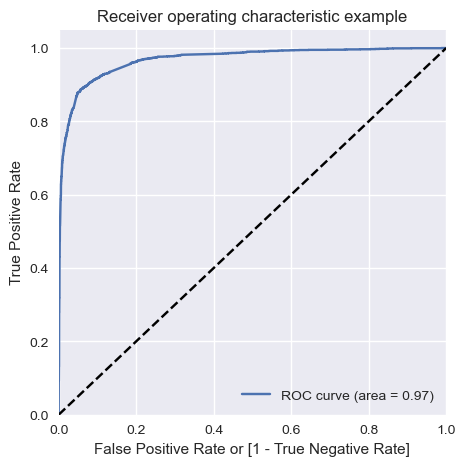

In [250]:
draw_roc(y_train_perd_final['Converted'], y_train_perd_final['Converted_prob'])

## Finding Optimal Cutoff point

In [251]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_perd_final[i]= y_train_perd_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_perd_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.010354,1871,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.104430,6795,0,1,1,0,0,0,0,0,0,0,0
3516,0,0.012652,3516,0,1,0,0,0,0,0,0,0,0,0
8105,0,0.158295,8105,0,1,1,0,0,0,0,0,0,0,0
3934,0,0.181526,3934,0,1,1,0,0,0,0,0,0,0,0


In [252]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_perd_final['Converted'], y_train_perd_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.838126  0.973642  0.754623
0.2   0.2  0.896104  0.931468  0.874313
0.3   0.3  0.910482  0.914436  0.908046
0.4   0.4  0.919759  0.890916  0.937531
0.5   0.5  0.922233  0.873479  0.952274
0.6   0.6  0.912028  0.823195  0.966767
0.7   0.7  0.904917  0.791565  0.974763
0.8   0.8  0.892703  0.745742  0.983258
0.9   0.9  0.875850  0.690187  0.990255


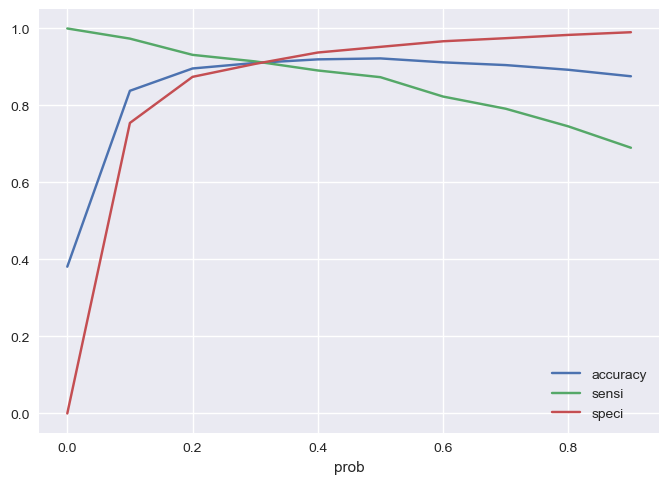

In [253]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.style.use('seaborn')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [254]:
y_train_perd_final['final_predicted'] = y_train_perd_final['Converted_prob'].map(lambda x: 1 if x > 0.32 else 0)


In [255]:
print(accuracy_score(y_train_perd_final['Converted'], y_train_perd_final['final_predicted']))

0.9128014842300557


In [256]:
precision_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted'])

0.9185501066098081

In [257]:
recall_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted'])

0.8734793187347932

Precission Recall Tradeoff

In [258]:
from sklearn.metrics import precision_recall_curve

In [259]:
p, r, thresholds = precision_recall_curve(y_train_perd_final['Converted'], y_train_perd_final['Converted_prob'])

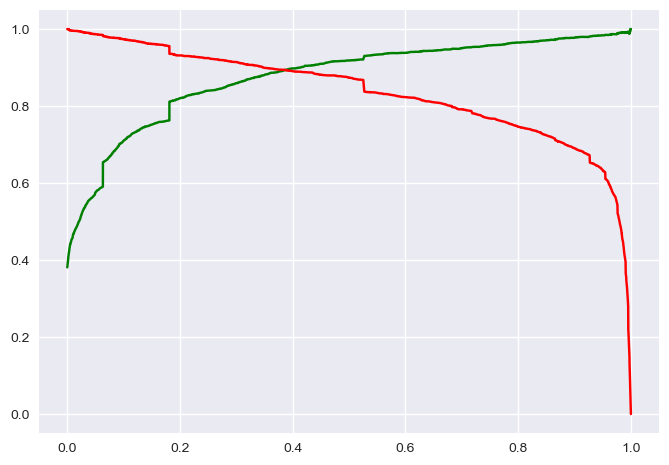

In [260]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [265]:
y_train_perd_final['final_predicted_from_precision_recall_curve'] = y_train_perd_final['Converted_prob'].map(lambda x: 1 if x > 0.38 else 0)


In [266]:
accuracy_score(y_train_perd_final['Converted'], y_train_perd_final['final_predicted_from_precision_recall_curve'])

0.9177489177489178

In [267]:
precision_score(y_train_perd_final['Converted'], y_train_perd_final['final_predicted_from_precision_recall_curve'])

0.8905492730210016

In [268]:
recall_score(y_train_perd_final['Converted'], y_train_perd_final['final_predicted_from_precision_recall_curve'])

0.8941605839416058

In [269]:
y_Test = main_Test_df.pop('Converted')
X_Test = main_Test_df[X_Train.columns]

In [270]:
main_Test_df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaller.transform(main_Test_df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [272]:
X_Test = main_Test_df[X_Train.columns]

In [273]:
X_Test_sm = sm.add_constant(X_Test)
y_test_perd = logml2.fit().predict(X_Test_sm)


In [274]:
y_test_perd_final = pd.DataFrame({'Converted': y_Test.values, 'Converted_prob': y_test_perd})

In [276]:
y_test_perd_final['Predicted'] = y_test_perd_final['Converted_prob'].map(lambda x: 1 if x > 0.38 else 0)

In [277]:
accuracy_score(y_test_perd_final['Converted'], y_test_perd_final['Predicted'])

0.9170274170274171

In [278]:
precision_score(y_test_perd_final['Converted'], y_test_perd_final['Predicted'])

0.8899909828674482

In [279]:
recall_score(y_test_perd_final['Converted'], y_test_perd_final['Predicted'])

0.9013698630136986